In [448]:
setwd('D:/Working/03.Korea/회귀분석/report/Chapter4')
#p128_data<-read.csv("example_4.12.csv",header=T)
p128_data <- read.table("P128.txt", header = TRUE)
str(p128_data)

p128_reg <- lm(Y ~ ., p128_data)

'data.frame':	40 obs. of  7 variables:
 $ Y : int  443 290 676 536 481 296 453 617 514 400 ...
 $ X1: int  49 27 115 92 67 31 105 114 98 15 ...
 $ X2: int  79 70 92 62 42 54 60 85 72 59 ...
 $ X3: int  76 31 130 92 94 34 47 84 71 99 ...
 $ X4: int  8 6 0 5 16 14 5 17 12 15 ...
 $ X5: int  15 6 9 8 3 11 10 20 -1 11 ...
 $ X6: int  205 129 339 247 202 119 212 285 242 174 ...


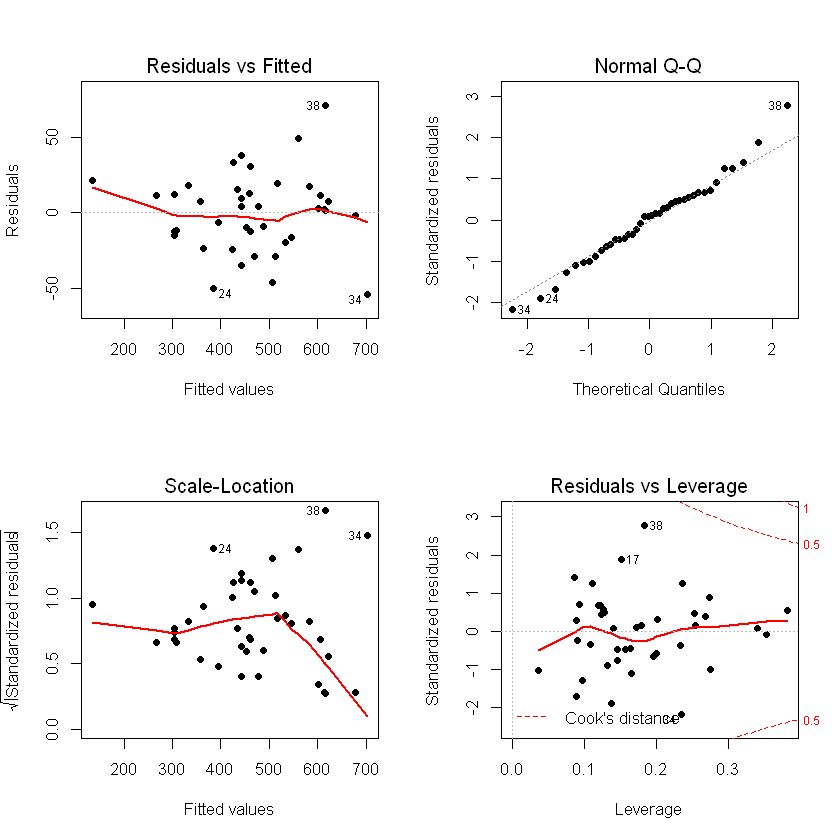

In [338]:
par(mfrow = c(2,2))
plot(p128_reg, pch = 16, lwd = 2)

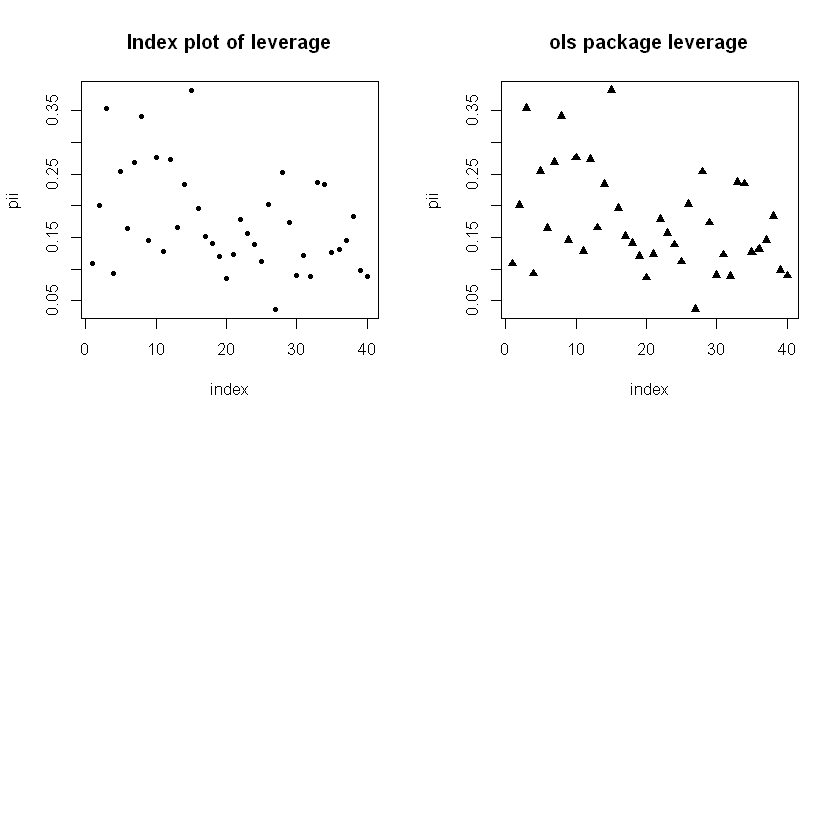

In [433]:
library(olsrr)
par(mfrow=c(2,2))

plot(hatvalues(p128_reg), pch=20, main="Index plot of leverage",xlab="index",ylab="pii")
plot(ols_leverage(p128_reg), pch=17, main="ols package leverage",xlab="index",ylab="pii")

In [339]:
# Hadi의 영향력 측도 
# http://www.r-tutor.com/elementary-statistics/simple-linear-regression/residual-plot
# http://www.r-tutor.com/elementary-statistics/simple-linear-regression/standardized-residual
# https://www.r-bloggers.com/leverage-and-influence-in-a-nutshell/
# https://datascienceschool.net/view-notebook/e18a542e4dbd429f8666ccafd1067e7d/

p128_res <- resid(p128_reg)
p128_std_res <- rstandard(p128_reg)

p128_influ <- influence(p128_reg) # 중요한 포인트, 분석 필요 ***
ri_fomular <- resid(p128_reg) / (sigma(p128_reg) * sqrt(1 - p128_influ$hat))

nresid=resid(p128_reg)/(sigma(p128_reg)*sqrt(df.residual(p128_reg)))
hadi1 <- hatvalues(p128_reg) / (1 - hatvalues(p128_reg))
hadi2 <- (length(p128_reg$coeff) / (1 - hatvalues(p128_reg))) * (nresid^2 / (1 - nresid^2))
diag_res <- ls.diag(p128_reg)

p128_result <- data.frame(ri = p128_std_res,
                          ri_check = ri_fomular,
                          Ci = cooks.distance(p128_reg),
                          DFITSi = dffits(p128_reg),
                          Hi = hadi1 + hadi2,
                          H1 = hadi1,
                          H2 = hadi2)
p128_result

ri,ri_check,Ci,DFITSi,Hi,H1,H2
-0.35129222,-0.35129222,0.0021423132,-0.12081534,0.1477836,0.12151893,0.026264655
-0.58952638,-0.58952638,0.0124256541,-0.29196157,0.3246183,0.25027116,0.074347151
-0.07792919,-0.07792919,0.0004744901,-0.05675715,0.5482097,0.54692139,0.001288357
0.71249421,0.71249421,0.0073966729,0.22581440,0.2112007,0.10199333,0.109207390
0.16181961,0.16181961,0.0012798353,0.09324305,0.3476867,0.34212893,0.005557804
-0.43825841,-0.43825841,0.0053752442,-0.19157273,0.2368421,0.19590058,0.040941471
0.39778121,0.39778121,0.0082838730,0.23769905,0.4001559,0.36647381,0.033682104
0.07611439,0.07611439,0.0004277140,0.05388674,0.5180237,0.51679464,0.001229045
-0.75045785,-0.75045785,0.0136865641,-0.30743417,0.2913460,0.17011393,0.121232092
-1.00173894,-1.00173894,0.0545949061,-0.61822805,0.5984914,0.38083868,0.217652683


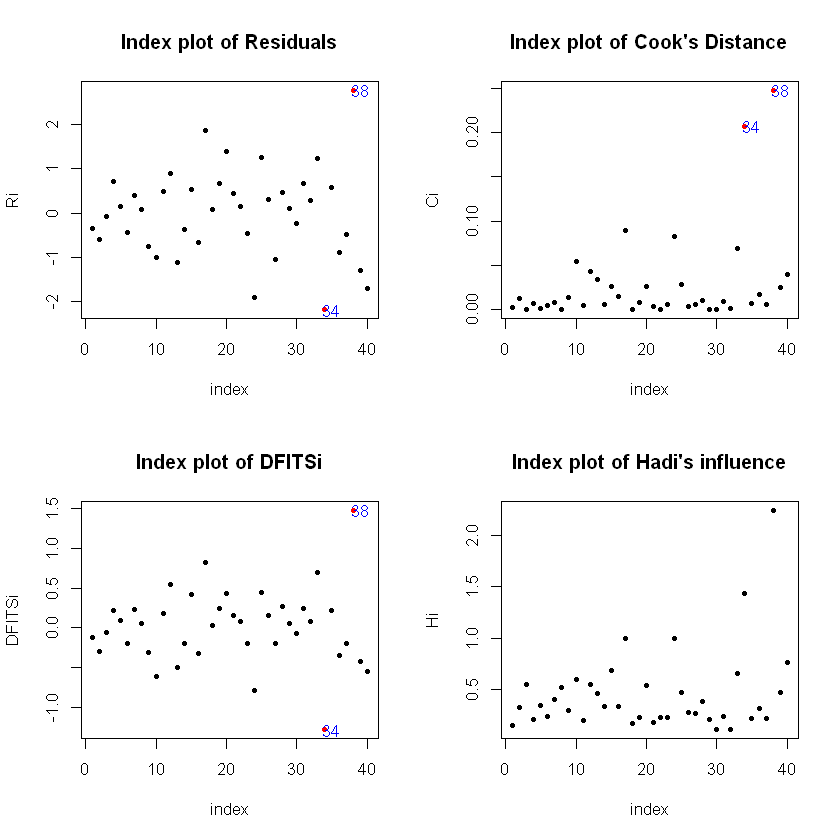

In [376]:
# ls.diag 사용도 고려.

par(mfrow=c(2,2))

# Standard Residuals
plot(p128_std_res, pch=20, main="Index plot of Residuals", xlab="index", ylab="Ri", 
    col = ifelse(abs(p128_std_res) > 2 ,"red", "black"))
text(x=1 : length(p128_std_res) + 1, y=p128_std_res, labels=ifelse(abs(p128_std_res) > 2, names(p128_std_res),""), col="blue")

# https://cran.r-project.org/web/packages/referenceIntervals/referenceIntervals.pdf
# library(referenceIntervals)
# https://stats.stackexchange.com/questions/164099/removing-outliers-based-on-cooks-distance-in-r-language
# Cook's Distance
# Plot the Cook's Distance using the traditional 4/n criterion
cooks_dist <- cooks.distance(p128_reg)
n <- nrow(p128_data) # sample_size
cooks_outlier <- 4/n
plot(cooks_dist, pch=20, main="Index plot of Cook's Distance" ,xlab="index", ylab="Ci",
    col = ifelse(cooks_dist > cooks_outlier ,"red", "black"))
text(x=1 : length(cooks_dist) + 1, y=cooks_dist, labels=ifelse(cooks_dist > cooks_outlier, names(cooks_dist),""), col="blue")

# Welsch & Kuh 의 측도 DFITSi
# https://rpubs.com/rwhitt/159756
# 2 * sqrt (p + 1)/(n - p - 1)
dffits_value <- dffits(p128_reg)
p <- length(p128_reg$coefficients)
dffits_outlier <- 2 * sqrt((p + 1)/(n - p - 1))

plot(dffits_value, pch=20, main="Index plot of DFITSi" ,xlab="index", ylab="DFITSi",
    col = ifelse(abs(dffits_value) > dffits_outlier ,"red", "black"))
text(x=1 : length(dffits_value) + 1, y=dffits_value, labels=ifelse(abs(dffits_value) > cv, names(dffits_value),""), col="blue")

# Hadi
plot(hadi1 + hadi2, pch=20 ,main="Index plot of Hadi's influence", xlab="index", ylab="Hi")

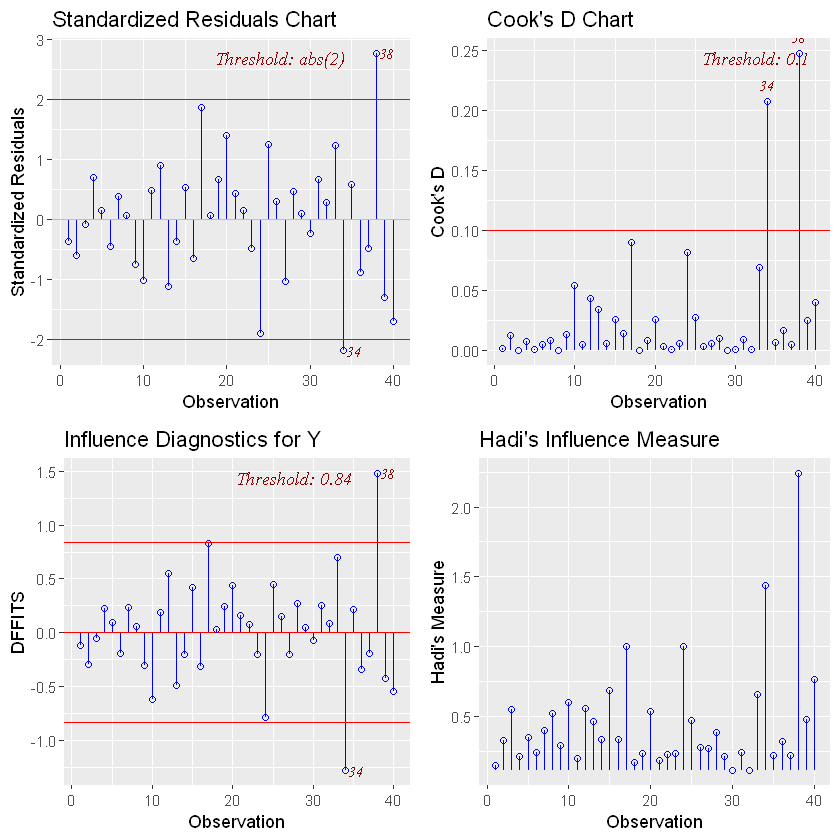

In [395]:
# https://cran.r-project.org/web/packages/olsrr/vignettes/influence_measures.html
# https://cran.r-project.org/web/packages/olsrr/olsrr.pdf
library(ggplot2)
library(gridExtra)
library(olsrr)

# 선언이 되는 순간 바로 한개씩 그려지고 나서 plot  분할 되는 문제가 발생하여, 밑에서 선언 후 위에서 grid.arrange  만 사용 해서 편집.
p1 <- ols_plot_resid_stand(p128_reg)$plot
p2 <- ols_plot_cooksd_chart(p128_reg)$plot
p3 <- ols_plot_dffits(p128_reg)$plot
p4 <- ols_plot_hadi(p128_reg)

grid.arrange(p1, p2, p3, p4, ncol=2, nrow=2)

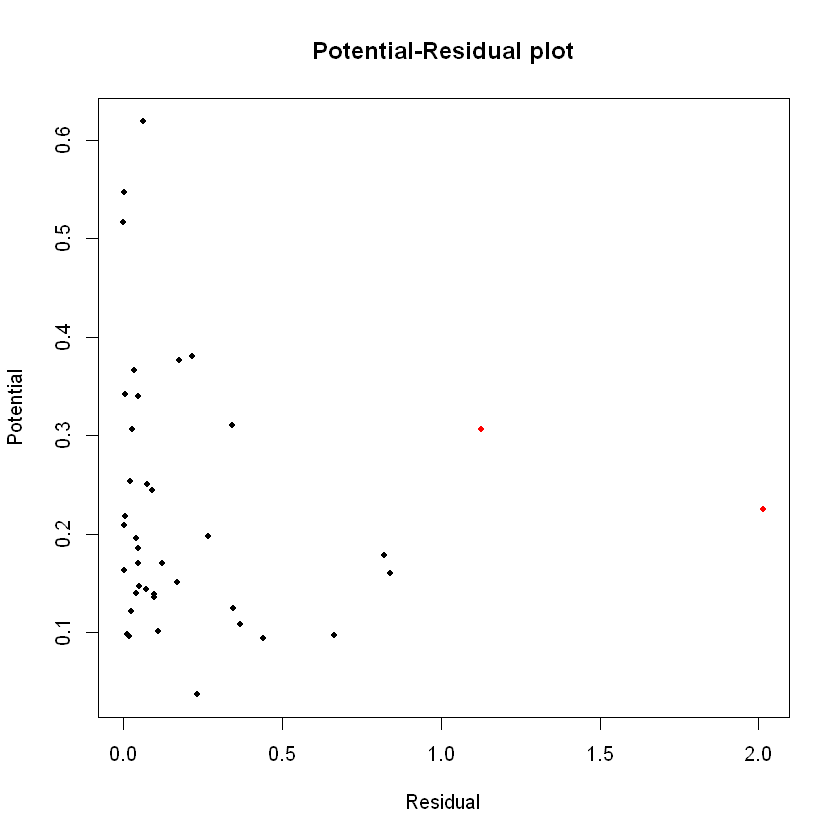

In [383]:
prplot = data.frame(hadi1, hadi2, obsn=1:20)
plot(hadi2, hadi1, pch=20, main="Potential-Residual plot", xlab="Residual", ylab="Potential",
    col = ifelse(prplot$hadi2 > 1 ,"red", "black"))

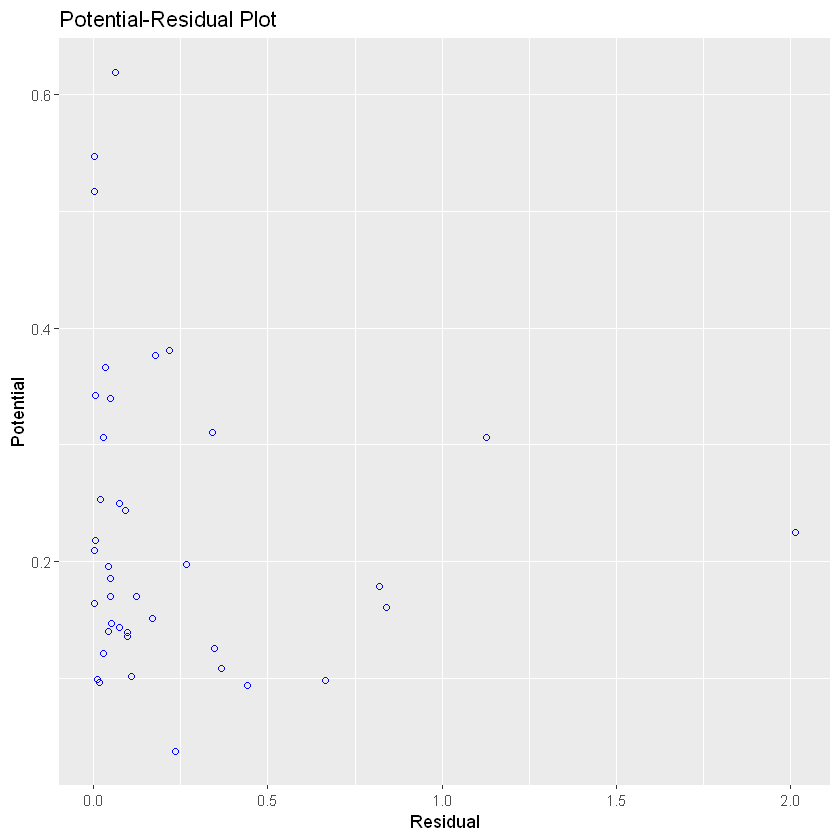

In [397]:
ols_plot_resid_pot(p128_reg)

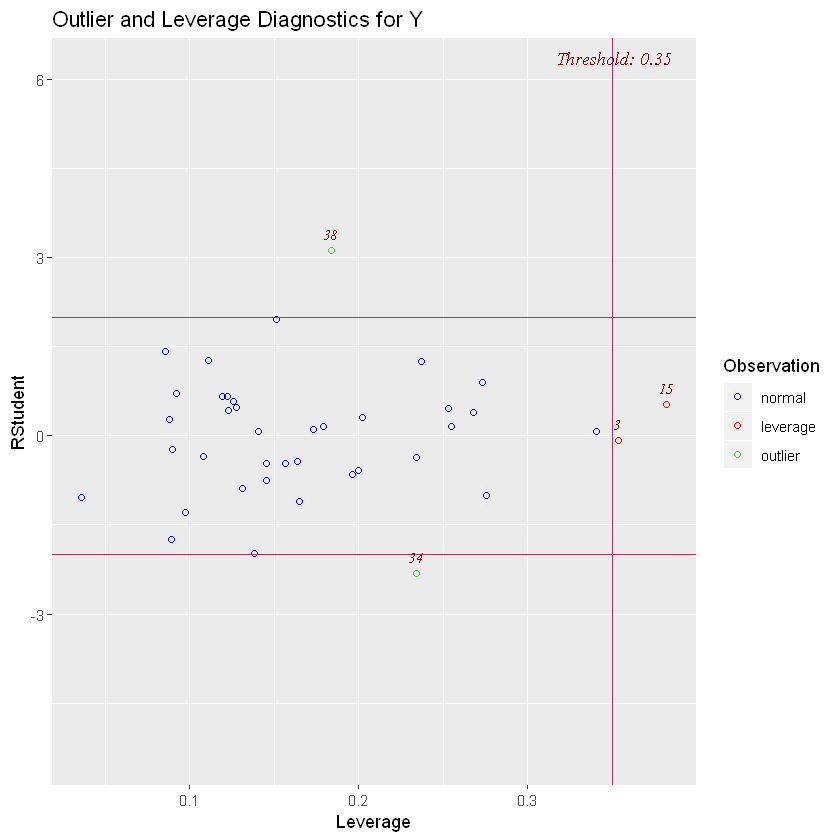

In [398]:
ols_plot_resid_lev(p128_reg)